In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 
  
# metadata 
print(ionosphere.metadata) 
  
# variable information 
print(ionosphere.variables) 

{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d ar

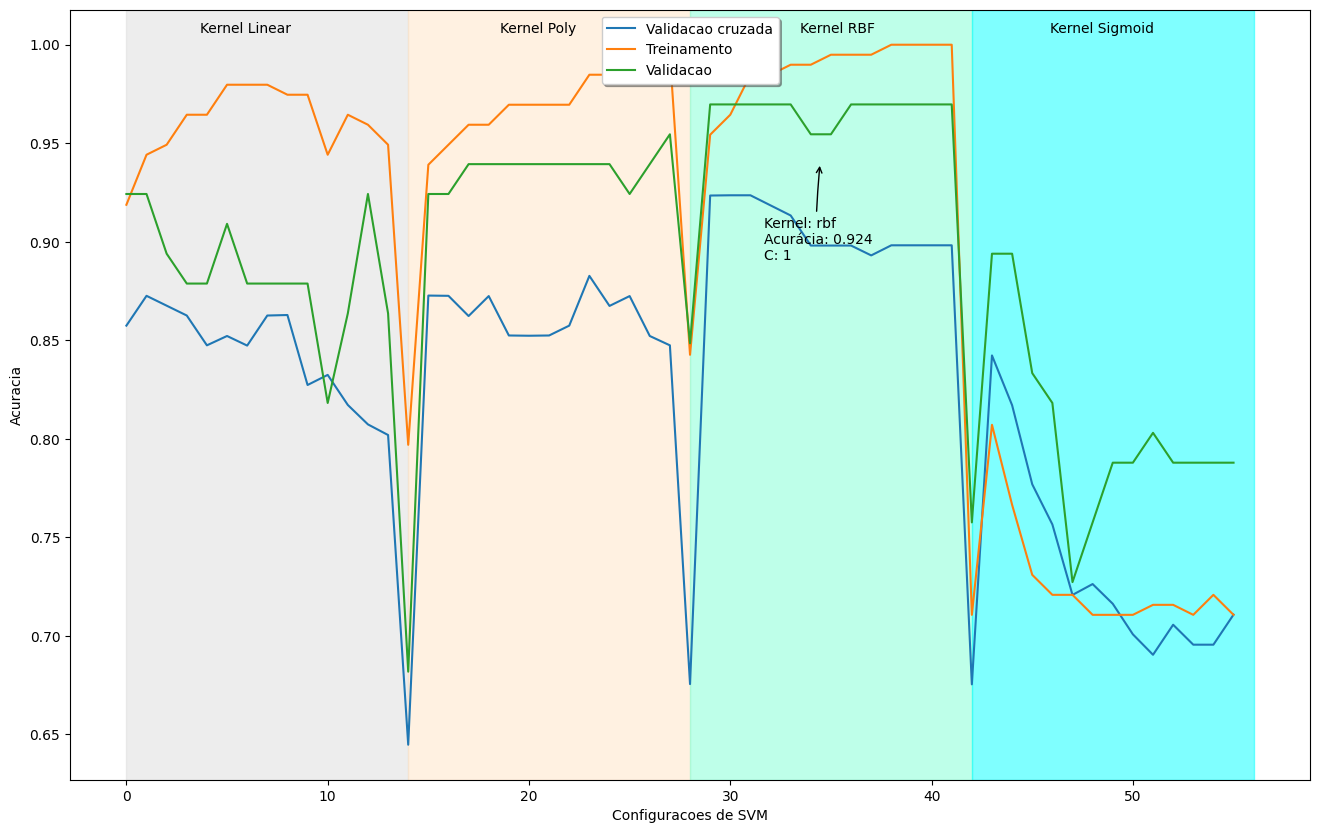

Desempenho da melhor configuracao testada:
Acuracia de treinamento clf: 0.954
Acuracia de validacao clf: 0.970
Acuracia de teste clf: 0.932


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
#
#
# USANDO O SVM NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS Kernels PARA A BASE
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.colors as mcolors
from math import ceil
plt.rcParams['figure.figsize'] = [16, 10]

#construindo conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#criando o classificador
clf = SVC()

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)

#construindo o espaco de busca por configuracoes do classificador
kernels_range = ['linear','poly','rbf','sigmoid']
c_range =[0.1,1,2,4,5,10,15,20,30,50,100,200,500,1000]
gamma_ = [1,3,4,5,7,10,15,20,25,30,40,50,100,200,500,1000]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []

# use iteration to caclulator different kernels in models,
# then return the average accuracy based on the cross validation
for j in range(len(kernels_range)):
  for k in c_range:
    if(kernels_range[j]=='linear'):
      svc = LinearSVC(C=k)
    else:
      svc = SVC(C=k, kernel=kernels_range[j])
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    k_scores_cross.append(scores.mean())
    svc.fit(X_train, y_train)
    k_scores_train.append(svc.score(X_train, y_train))
    k_scores_valid.append(svc.score(X_valid, y_valid))


#encontrando a melhor configuracao testada
the_best_acc=k_scores_cross.index(max(k_scores_cross))
the_best_kernel=ceil(the_best_acc/len(c_range))-1
the_best_c = the_best_acc/len(c_range)
the_best_c = (the_best_c-int(the_best_c))*len(c_range)
st_out = ("Kernel: " + str(kernels_range[the_best_kernel])+" \nAcurácia: " +
          str(round(k_scores_cross[the_best_acc],3))+"\nC: "+str(c_range[int(the_best_c)]))

# Apresentando todas as configuracoes testadas
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.axvspan(0, len(c_range), color='gainsboro', alpha=0.5)
plt.axvspan(len(c_range), 2*len(c_range), color='bisque', alpha=0.5)
plt.axvspan(2*len(c_range), 3*len(c_range), color='aquamarine', alpha=0.5)
plt.axvspan(3*len(c_range), 4*len(c_range), color='cyan', alpha=0.5)
plt.annotate('Kernel Linear',xy=(200, 800), xycoords='figure pixels')
plt.annotate('Kernel Poly',xy=(500, 800), xycoords='figure pixels')
plt.annotate('Kernel RBF',xy=(800, 800), xycoords='figure pixels')
plt.annotate('Kernel Sigmoid',xy=(1050, 800), xycoords='figure pixels')
plt.annotate(st_out, xy=(820, 670), xycoords='figure pixels',xytext=(-40, -70), textcoords='offset points',
        arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Configuracoes de SVM')
plt.ylabel('Acuracia')
plt.show()

#desempenho da melhor configuracao
clf = SVC(C=c_range[int(the_best_c)], kernel=kernels_range[the_best_kernel])

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)
print("Desempenho da melhor configuracao testada:")
print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))
